# Projeto Integrador Parte B – Preparação dos Dados

Entregas: 
1) Faça um relatório respondendo cada pergunta separadamente. 
2) Link para a base utilizada. 
3) Código completo em Python.

Dando continuidade ao Projeto Integrador - Parte A, faça uma análise dos mesmos dados utilizados anteriormente, respondendo às seguintes questões:


### ALUNAS
- Gabriella Braz
- Giovana Ribeiro

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv("data/tb_1.csv")
print(df.dtypes)

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [97]:
df["target"] = (
    (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3 >= 60
).astype(int)

In [98]:
X = df.drop("target", axis=1)
y = df["target"]

In [99]:
# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

In [100]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [101]:
# Criar e treinar o classificador de árvore de decisão
decision_T = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=25,
    min_samples_leaf=8,
    random_state=7,
)
decision_T.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=25,
                       random_state=7)

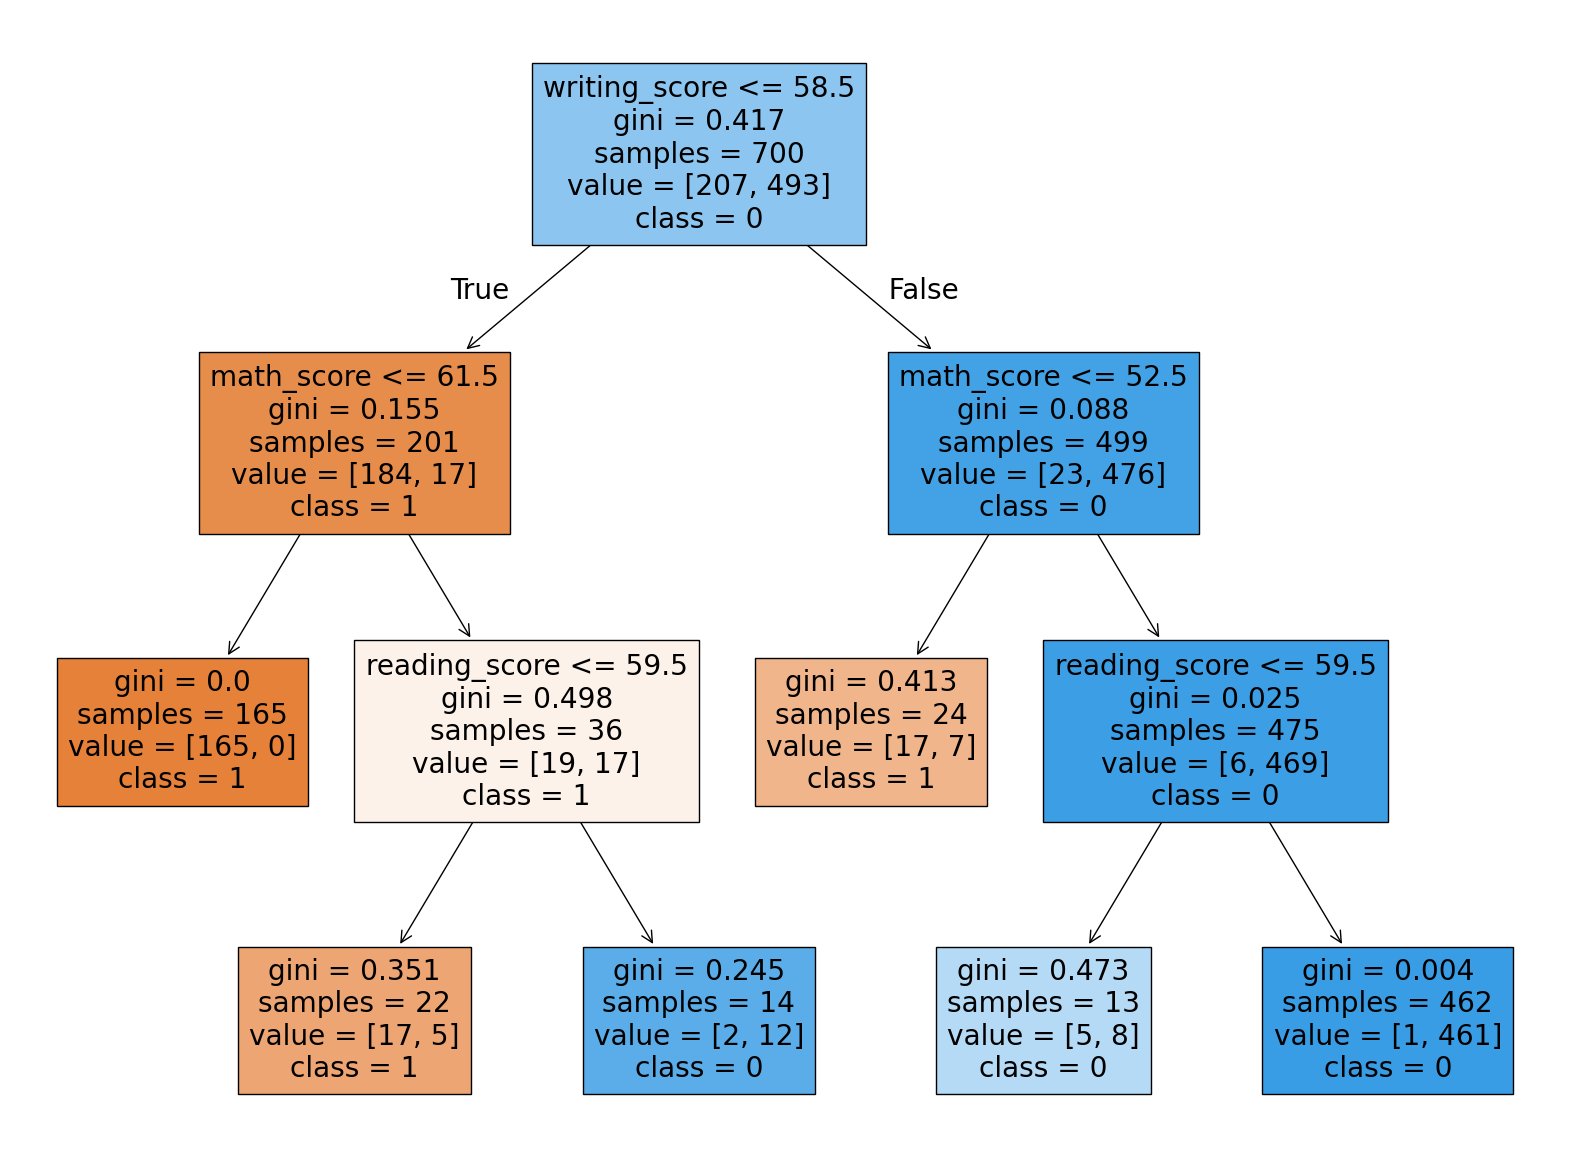

In [102]:
# Visualizar a árvore
plt.figure(figsize=(20, 15))  # Ajustei o tamanho para ficar legível
plot_tree(
    decision_T,
    filled=True,
    feature_names=X.columns,
    class_names=df["target"].astype(str).unique(),
)
plt.show()

In [103]:
# Fazer previsões
y_pred = decision_T.predict(X_test)

# Avaliar o modelo
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))


Acurácia: 0.9633333333333334


In [104]:
# Importância das variáveis
print("Importância das variáveis:")
importances = decision_T.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"- {feature}: {importances[i]:.4f}")

Importância das variáveis:
- math_score: 0.1345
- reading_score: 0.0400
- writing_score: 0.8255
- gender_male: 0.0000
- race_ethnicity_group B: 0.0000
- race_ethnicity_group C: 0.0000
- race_ethnicity_group D: 0.0000
- race_ethnicity_group E: 0.0000
- parental_level_of_education_bachelor's degree: 0.0000
- parental_level_of_education_high school: 0.0000
- parental_level_of_education_master's degree: 0.0000
- parental_level_of_education_some college: 0.0000
- parental_level_of_education_some high school: 0.0000
- lunch_standard: 0.0000
- test_preparation_course_none: 0.0000


## RELATÓRIO 
A árvore de decisão treinada para prever se os estudantes teriam média igual ou superior a 60 apresentou acurácia de 96,33%, indicando um bom desempenho do modelo. As notas de escrita (writing_score) foram a variável mais importante, seguidas por matemática e leitura, enquanto todas as variáveis categóricas, como gênero, etnia, nível educacional dos pais, tipo de almoço e curso preparatório, não tiveram influência na decisão da árvore.

Esses resultados mostram que, para este conjunto de dados, o desempenho acadêmico dos alunos é o principal fator para determinar a aprovação, enquanto características sociodemográficas e de apoio escolar não impactam significativamente o modelo.